# Pretreatment 3

Based off the 'CNN regression coefficients' presented by  Mishra and Passos (2021) for augmented spectra dataset used with CNN model, the SNV + 2nd derivative pretreatment had the highest overall weighting. Also this is a common preprocessing method.  Thus use only this.

## References
Mishra, P., & Passos, D. (2021). A synergistic use of chemometrics and deep learning improved the predictive performance of near-infrared spectroscopy models for dry matter prediction in mango fruit. Chemometrics and Intelligent Laboratory Systems, 212. [https://doi:10.1016/j.chemolab.2021.104287]()

## Setup

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MaxNLocator
from scipy.signal import savgol_filter

In [8]:
# read in prepared dataset from previous step
df = pd.read_pickle("../2_sample_selection/data/prepared/mango_dmc_and_spectra_v2.pkl")
wavelength_cols = df.filter(regex="^\d+", axis=1).columns
descriptive_cols = [col for col in df.columns if col not in wavelength_cols]
wavelength_cols = wavelength_cols.astype(int).tolist()
df.columns = descriptive_cols + wavelength_cols
df

,partition_1,outlier_flag_1,train_partition_1,sample_order_1,origin,population,date,season,region,cultivar,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,train,0,calibration,25670,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train,0,calibration,16789,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train,0,calibration,63678,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train,0,calibration,81577,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train,0,tunning,5762,published,100100,2015-09-27,2015,NT,caly,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,0,,6265,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88449,test,0,,54886,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88450,test,0,,76820,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88451,test,0,,860,marcelo,200800,NaT,2021,QLD,keitt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Wavelength Range

In [9]:
initial_wavelengths = [w for w in wavelength_cols if 309 <= w <= 1149]
final_wavelengths = [w for w in wavelength_cols if 309 <= w <= 1149]

## Pretreatments

In [10]:
# standard normal variate (SNV)
p1 = df[initial_wavelengths].apply(lambda x: (x - x.mean()) / x.std())
p1

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,-1.888136,-1.227638,-1.931621,-1.946656,-1.783984,-2.759727,-2.570388,-2.273021,-2.256335,-1.418154,...,-0.799597,-0.976466,-0.934226,-0.981475,-1.025151,-0.953568,-1.066540,-0.766737,-0.857961,-0.742333
1,-2.089738,-2.586581,-2.391904,-1.971659,-2.041194,-2.546693,-2.499119,-2.221456,-2.625388,-2.392117,...,-0.937819,-0.927847,-0.978524,-0.937145,-1.056907,-0.983353,-0.962980,-0.980435,-1.105177,-0.808353
2,-2.446686,-2.310527,-2.771469,-2.577192,-1.903507,-2.027181,-2.483274,-1.799994,-1.842892,-2.231433,...,-0.781349,-0.886670,-0.986009,-1.078944,-0.995304,-1.005493,-1.108398,-0.819664,-0.827162,-0.732233
3,-2.115655,-2.515251,-2.424608,-2.183295,-2.143954,-2.359292,-2.548068,-1.898352,-2.038415,-2.187994,...,-0.845569,-0.855140,-0.982174,-0.977433,-1.024034,-0.999840,-1.005606,-0.929301,-0.836801,-0.810540
4,-2.865089,-2.374414,-2.262973,-2.622999,-2.358881,-1.646309,-2.050853,-1.436601,-2.634481,-1.575602,...,-0.979872,-0.873323,-1.015282,-0.905758,-1.048341,-0.955139,-1.009651,-0.929905,-0.954825,-0.819562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,-1.350022,0.402516,1.768663,2.505283,2.425514,1.521191,-0.664054,0.021481,1.160651,0.206402,...,1.780597,1.370584,1.157739,1.041288,1.004620,0.965110,1.313602,-0.162775,-0.174920,-0.238678
88449,2.023460,0.955692,10.072632,-0.174235,0.762989,-2.814009,-4.272852,-2.411837,-1.437373,-2.837874,...,1.726367,1.302156,1.124045,1.023210,0.987897,0.946626,1.276922,-0.162775,-0.174920,-0.238678
88450,1.220383,-0.672155,0.659284,2.548646,0.719626,0.402949,0.064449,-0.771691,-3.873506,-6.352246,...,1.916796,1.503325,1.296102,1.213486,1.243643,1.211510,1.655367,-0.162775,-0.174920,-0.238678
88451,0.905892,3.663742,1.925983,1.173467,5.995858,2.887071,7.205189,4.637469,-0.312713,0.491922,...,1.928808,1.464559,1.235865,1.140676,1.096861,1.023229,1.356388,-0.162775,-0.174920,-0.238678


In [11]:
# SNV + Savitzky-Golay smoothing (2nd deriv)
p2 = p1.apply(
    lambda row: savgol_filter(
        x=row,
        window_length=13,
        polyorder=2,
        deriv=2
    ),
    axis=1,
    result_type="expand"
)
p2.columns = initial_wavelengths
p2

,309,312,315,318,321,324,327,330,333,336,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,0.046941,0.046941,0.046941,0.046941,0.046941,0.046941,0.046941,0.040935,0.011609,0.019490,...,-0.000045,0.009120,0.012776,0.016275,0.016275,0.016275,0.016275,0.016275,0.016275,0.016275
1,0.017813,0.017813,0.017813,0.017813,0.017813,0.017813,0.017813,0.006443,0.023020,0.038992,...,0.006479,0.007146,0.003257,0.008712,0.008712,0.008712,0.008712,0.008712,0.008712,0.008712
2,-0.004747,-0.004747,-0.004747,-0.004747,-0.004747,-0.004747,-0.004747,-0.005851,-0.002167,0.019012,...,-0.001872,0.005095,0.011829,0.018261,0.018261,0.018261,0.018261,0.018261,0.018261,0.018261
3,0.004800,0.004800,0.004800,0.004800,0.004800,0.004800,0.004800,-0.006835,0.003940,0.016592,...,0.004785,0.007669,0.010690,0.010676,0.010676,0.010676,0.010676,0.010676,0.010676,0.010676
4,-0.040668,-0.040668,-0.040668,-0.040668,-0.040668,-0.040668,-0.040668,-0.020538,-0.009774,0.000411,...,0.004747,0.006400,0.009108,0.012207,0.012207,0.012207,0.012207,0.012207,0.012207,0.012207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,-0.142262,-0.142262,-0.142262,-0.142262,-0.142262,-0.142262,-0.142262,-0.022007,0.035892,0.067528,...,0.020574,0.001990,-0.005938,-0.008079,-0.008079,-0.008079,-0.008079,-0.008079,-0.008079,-0.008079
88449,0.048072,0.048072,0.048072,0.048072,0.048072,0.048072,0.048072,0.252065,0.413394,0.206063,...,0.019650,-0.000032,-0.007155,-0.007222,-0.007222,-0.007222,-0.007222,-0.007222,-0.007222,-0.007222
88450,0.026280,0.026280,0.026280,0.026280,0.026280,0.026280,0.026280,0.082513,0.123520,0.172280,...,0.024459,-0.000898,-0.013855,-0.017829,-0.017829,-0.017829,-0.017829,-0.017829,-0.017829,-0.017829
88451,-0.175132,-0.175132,-0.175132,-0.175132,-0.175132,-0.175132,-0.175132,-0.092946,-0.065367,0.001666,...,0.017641,-0.002205,-0.008578,-0.008169,-0.008169,-0.008169,-0.008169,-0.008169,-0.008169,-0.008169


### Visualise Pretreatments

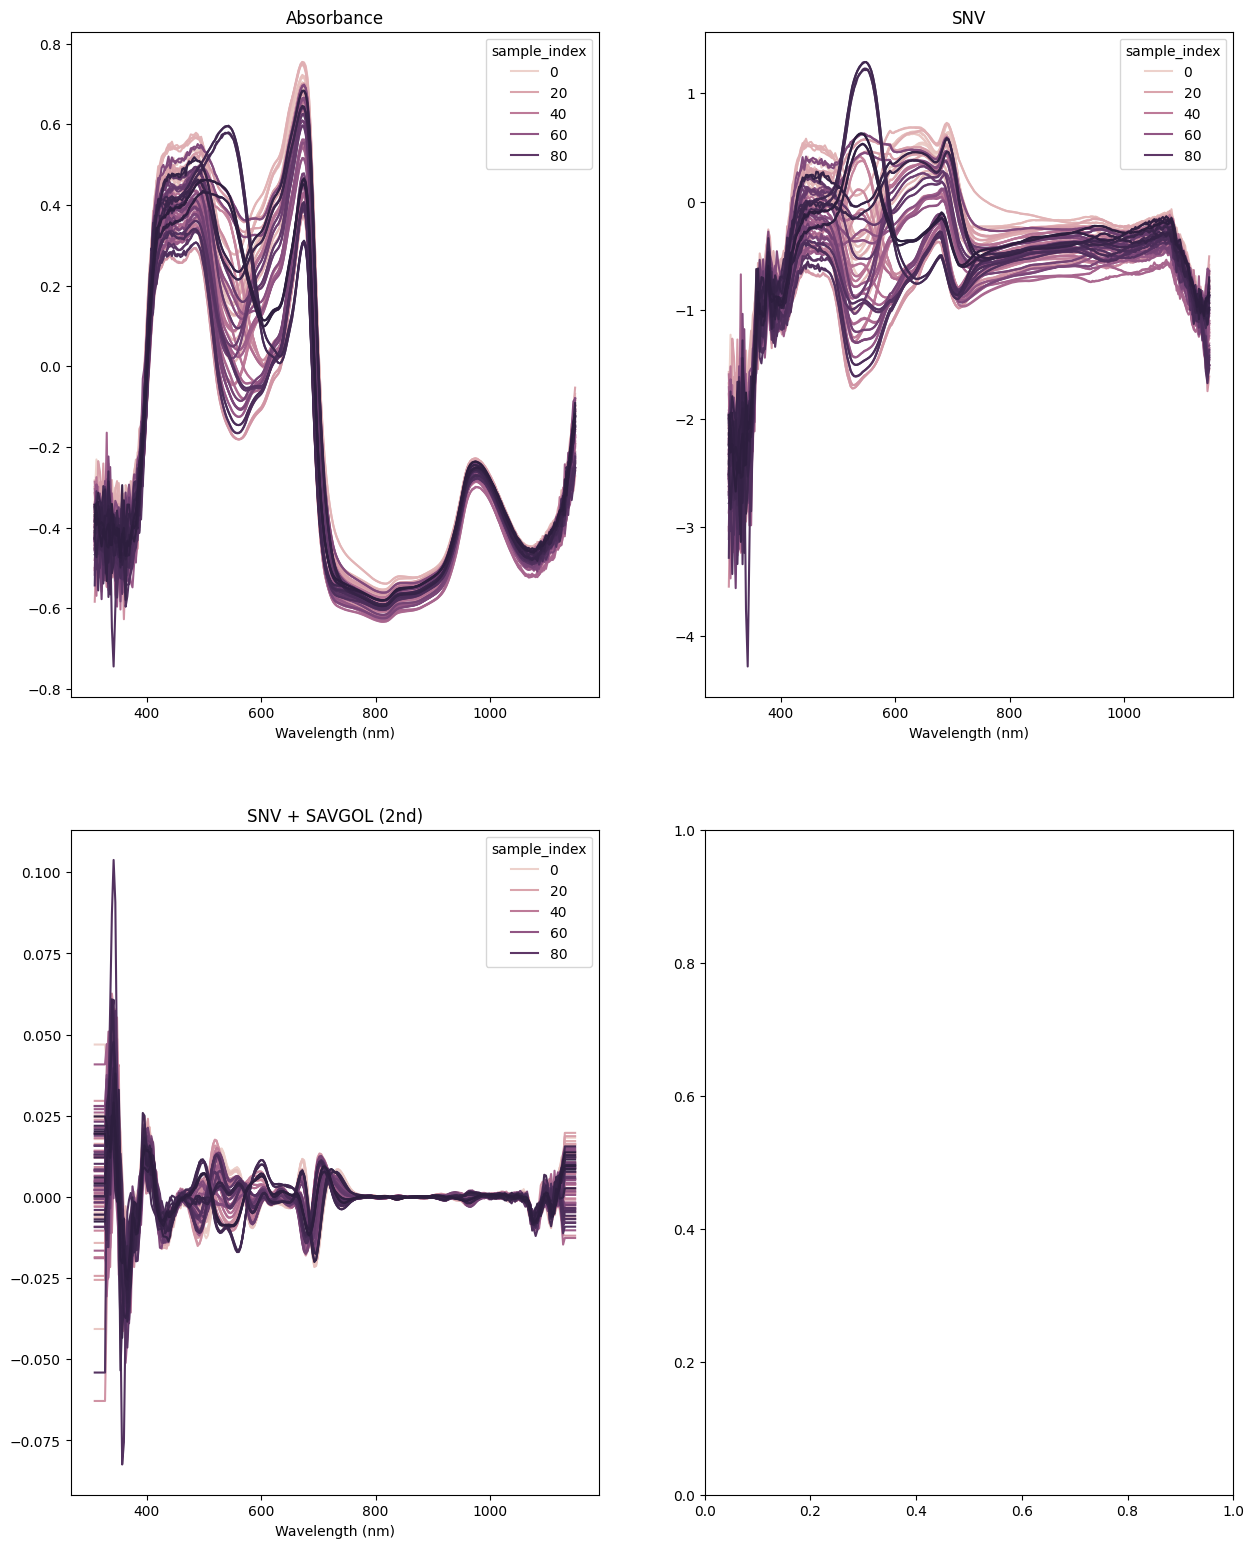

In [13]:
first_n_samples = 100
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 19))

def plot_data(data, ax, title, xlabel):
    plot = sns.lineplot(
        data=(data[:first_n_samples]
              .reset_index(names="sample_index")
              .melt(id_vars="sample_index", var_name="wavelength", value_name="absorbance")),
        x="wavelength", y="absorbance", hue="sample_index", ax=ax
    )
    plot.set(title=title, xlabel=xlabel, ylabel=None)
    plot.xaxis.set_major_locator(MaxNLocator(nbins=6))

# Absorbance
plot_data(df[initial_wavelengths], axs[0, 0], "Absorbance", "Wavelength (nm)")

# Standard Normal Variate (SNV)
plot_data(p1, axs[0, 1], "SNV", "Wavelength (nm)")

# SNV + Savitzky-Golay smoothing (2nd deriv)
plot_data(p2, axs[1, 0], "SNV + SAVGOL (2nd)", "Wavelength (nm)")

plt.show()

## Prepare final dataset

In [11]:
df_final = pd.concat(
    objs=[
        df[descriptive_cols],
        p2[final_wavelengths].add_suffix("_snv_savgol_d2"),
    ],
    axis=1
)
df_final

,partition_1,outlier_flag_1,origin,population,date,season,region,cultivar,physio_stage,temp,...,963_snv_savgol_d2,966_snv_savgol_d2,969_snv_savgol_d2,972_snv_savgol_d2,975_snv_savgol_d2,978_snv_savgol_d2,981_snv_savgol_d2,984_snv_savgol_d2,987_snv_savgol_d2,990_snv_savgol_d2
0,train,0,published,100100,2015-09-27,2015,NT,caly,green,high,...,-0.002778,-0.002720,-0.002469,-0.002156,-0.001837,-0.001553,-0.001339,-0.001169,-0.001063,-0.000902
1,train,0,published,100100,2015-09-27,2015,NT,caly,green,high,...,-0.002774,-0.002710,-0.002481,-0.002127,-0.001777,-0.001501,-0.001309,-0.001194,-0.001102,-0.001024
2,train,0,published,100100,2015-09-27,2015,NT,caly,green,low,...,-0.003109,-0.003041,-0.002751,-0.002327,-0.001927,-0.001626,-0.001408,-0.001243,-0.001094,-0.000961
3,train,0,published,100100,2015-09-27,2015,NT,caly,green,low,...,-0.003101,-0.003058,-0.002777,-0.002381,-0.001993,-0.001653,-0.001390,-0.001210,-0.001078,-0.000941
4,train,0,published,100100,2015-09-27,2015,NT,caly,green,high,...,-0.002701,-0.002580,-0.002286,-0.001982,-0.001653,-0.001365,-0.001201,-0.001109,-0.001001,-0.000874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88448,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,-0.002406,-0.002367,-0.002157,-0.001872,-0.001588,-0.001341,-0.001181,-0.001066,-0.000970,-0.000877
88449,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,-0.002354,-0.002332,-0.002155,-0.001867,-0.001554,-0.001316,-0.001163,-0.001045,-0.000957,-0.000846
88450,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,-0.002355,-0.002349,-0.002176,-0.001900,-0.001601,-0.001387,-0.001242,-0.001149,-0.001060,-0.000943
88451,test,0,marcelo,200800,NaT,2021,QLD,keitt,green,undef,...,-0.002713,-0.002724,-0.002535,-0.002211,-0.001853,-0.001588,-0.001384,-0.001240,-0.001128,-0.001019


## Output data

In [12]:
# output
df_final.to_pickle("data/interim/pretreatment_3.pkl")